In [0]:
import pandas as pd
import numpy as np

In [2]:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 45.6MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1wLPB72yau1pfH8uMp4Mx1Wo0sopd7Y2r' # The shareable link

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('traindataframeuploadfinalforsubmission.csv')  
traindataframe= pd.read_csv('traindataframeuploadfinalforsubmission.csv',nrows=130000)

In [0]:
link = 'https://drive.google.com/open?id=1-e0aY1FCfhTZ0y7uAlRN3j6MOMdvXYeS' # The shareable link

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testdataframeuploadfinalforsubmission.csv')  
testdataframe= pd.read_csv('testdataframeuploadfinalforsubmission.csv',nrows=20072)

In [11]:
print(testdataframe.shape)

(20000, 6)


In [0]:
link = 'https://drive.google.com/open?id=1S8YirWWFIgpxNLuqiTjiIAAtyuIeRA7r' # The shareable link

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cvdataframeuploadfinalforsubmission.csv')  
cvdataframe= pd.read_csv('cvdataframeuploadfinalforsubmission.csv')

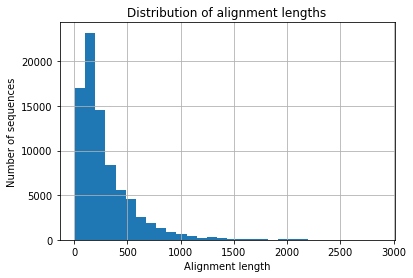

In [0]:
fd=pd.DataFrame()
import matplotlib.pyplot as plt
fd['alignment_length'] = traindataframe.aligned_sequence.str.len()
fd.alignment_length.hist(bins=30)
plt.title('Distribution of alignment lengths')
plt.xlabel('Alignment length')
plt.ylabel('Number of sequences')

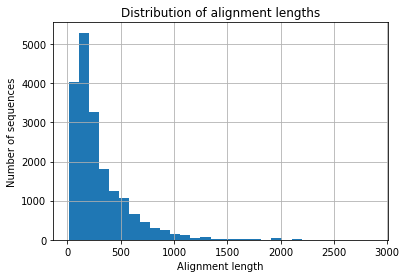

In [0]:
fd1=pd.DataFrame()
fd1['alignment_length'] = testdataframe.aligned_sequence.str.len()
fd1.alignment_length.hist(bins=30)
plt.title('Distribution of alignment lengths')
plt.xlabel('Alignment length')
plt.ylabel('Number of sequences')

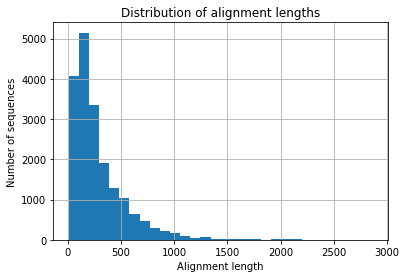

In [0]:
fd2=pd.DataFrame()
fd2['alignment_length'] = cvdataframe.aligned_sequence.str.len()
fd2.alignment_length.hist(bins=30)
plt.title('Distribution of alignment lengths')
plt.xlabel('Alignment length')
plt.ylabel('Number of sequences')

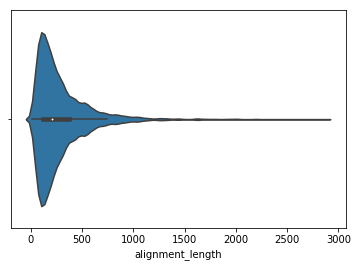

In [0]:
import seaborn as sns
sns.violinplot(fd['alignment_length'])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect1=CountVectorizer()
out1=vect1.fit_transform(totaldataframe['family_id'])
features1=vect1.get_feature_names()
counts1=out1.sum(axis=0)
print('number of unique families are',len(features1))

number of unique families are 13562


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
out=vect.fit_transform(totaldataframe['family_accession'])

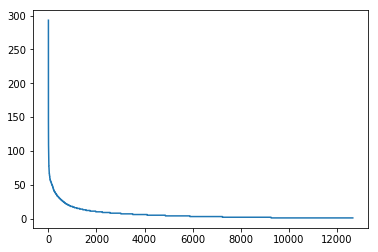

In [0]:
traincount=traindataframe1['family_accession'].value_counts()
plt.plot(traincount.values)

In [0]:
lengthofsequence=traindataframe['sequence'].apply(lambda x: len(x))

In [0]:
print(lengthofsequence.values)

[169  86  46 ...  65  90  57]


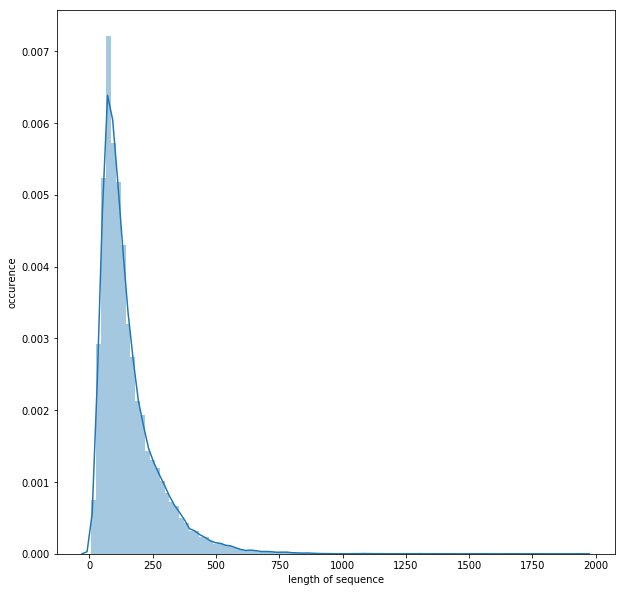

In [0]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.distplot(lengthofsequence.values,hist=True,bins=100)
plt.xlabel('length of sequence')
plt.ylabel('occurence')

In [0]:
import string
def string_vectorizer(strng, alphabet=string.ascii_lowercase):
    
    vector = [[0 if char != letter else 1 for char in alphabet] 
                  for letter in strng]
    vector1=np.array(vector)
    shapeout=vector1.shape[0]
    diff=200-shapeout
    reshapearray=np.zeros((diff,26),dtype=int)
    lenarray=len(strng)
    finalarray=np.vstack((vector,reshapearray,newarray))
    return finalarray

    

In [0]:
trainarray1=[]
for sen in traindataframe['sequence']:
   trainarray1.append(string_vectorizer(sen.lower()))
 
    

In [0]:
testarray1=[]
for sen in testdataframe['sequence']:
    testarray1.append(string_vectorizer(sen.lower()))

    

In [0]:
cvarray1=[]
for sen in cvdataframe['sequence']:
    cvarray1.append(string_vectorizer(sen.lower()))
       

In [0]:
trainarray1=np.array(trainarray1).reshape(130000,200,26)

In [0]:
testarray1=np.array(testarray1).reshape(20000,200,26)
cvarray1=np.array(cvarray1).reshape(20000,200,26)

In [0]:
totaldataframe=pd.concat([traindataframe,testdataframe],axis=0)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
out=vect.fit_transform(totaldataframe['family_accession'])
features=vect.get_feature_names()
counts=out.sum(axis=0)


In [0]:
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense,Dropout
from keras.utils import np_utils

In [0]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
label1.fit(totaldataframe['family_accession'])
trainy=label1.transform(traindataframe['family_accession'])
testy=label1.transform(testdataframe['family_accession'])
cvy=label1.transform(cvdataframe['family_accession'])

In [0]:
# this function is used draw Binary Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('\nBinary Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

In [24]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
model=Sequential()
model.add(Conv1D(100,kernel_size=(21),activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(250,26,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=70,validation_data=[testarray1,testy],batch_size=128) 


W0618 18:56:06.568818 139743238666112 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0618 18:56:06.841839 139743238666112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 130000 samples, validate on 20000 samples
Epoch 1/70
130000/130000 [==============================] - 121s 933us/step - loss: 5.7690 - acc: 0.2431 - val_loss: 4.1239 - val_acc: 0.3526
Epoch 2/70
130000/130000 [==============================] - 113s 870us/step - loss: 2.1282 - acc: 0.6275 - val_loss: 3.1806 - val_acc: 0.4644
Epoch 3/70
130000/130000 [==============================] - 113s 869us/step - loss: 1.0520 - acc: 0.7813 - val_loss: 1.9398 - val_acc: 0.6472
Epoch 4/70
130000/130000 [==============================] - 113s 870us/step - loss: 0.6432 - acc: 0.8529 - val_loss: 1.4035 - val_acc: 0.7410
Epoch 5/70
130000/130000 [==============================] - 113s 870us/step - loss: 0.4576 - acc: 0.8898 - val_loss: 1.2556 - val_acc: 0.7703
Epoch 6/70
130000/130000 [==============================] - 113s 869us/step - loss: 0.3547 - acc: 0.9109 - val_loss: 0.8780 - val_acc: 0.8448
Epoch 7/70
130000/130000 [==============================] - 113s 872us/step - loss: 0.2904 - acc:

In [23]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import LSTM
model=Sequential()
model.add(Conv1D(300,kernel_size=(21),activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv1D(250,26,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(LSTM(300,dropout=0.4,return_sequences=True))
model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=70,validation_data=[testarray1,testy],batch_size=128) 


W0619 05:54:02.029180 139960010635136 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 130000 samples, validate on 20000 samples
Epoch 1/70
130000/130000 [==============================] - 118s 904us/step - loss: 4.9852 - acc: 0.2799 - val_loss: 1.9962 - val_acc: 0.6245
Epoch 2/70
130000/130000 [==============================] - 114s 880us/step - loss: 1.6706 - acc: 0.6640 - val_loss: 1.0969 - val_acc: 0.7780
Epoch 3/70
130000/130000 [==============================] - 114s 880us/step - loss: 0.7416 - acc: 0.8196 - val_loss: 0.9559 - val_acc: 0.8147
Epoch 4/70
130000/130000 [==============================] - 114s 880us/step - loss: 0.4538 - acc: 0.8806 - val_loss: 0.9333 - val_acc: 0.8303
Epoch 5/70
130000/130000 [==============================] - 114s 879us/step - loss: 0.3307 - acc: 0.9079 - val_loss: 0.8951 - val_acc: 0.8394
Epoch 6/70
130000/130000 [==============================] - 114s 880us/step - loss: 0.2645 - acc: 0.9257 - val_loss: 0.8944 - val_acc: 0.8469
Epoch 7/70
130000/130000 [==============================] - 114s 878us/step - loss: 0.2243 - acc:

Accuracy: 87.81%


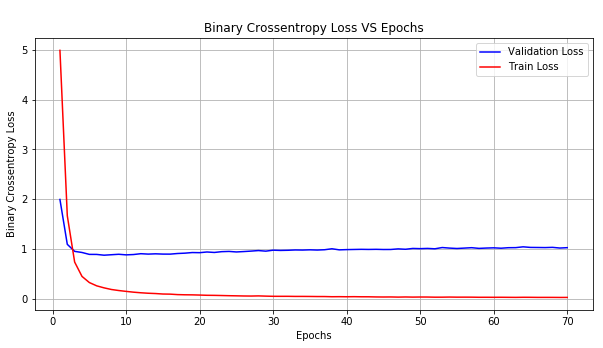

In [24]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,71))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [25]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import LSTM
model=Sequential()
model.add(Conv1D(300,kernel_size=(26),activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(Conv1D(250,26,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(LSTM(500,dropout=0.4,return_sequences=True))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=70,validation_data=[testarray1,testy],batch_size=256) 


W0619 08:12:08.018236 139960010635136 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0619 08:12:08.141388 139960010635136 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 130000 samples, validate on 20000 samples
Epoch 1/70
130000/130000 [==============================] - 116s 894us/step - loss: 6.0865 - acc: 0.1738 - val_loss: 2.9649 - val_acc: 0.4763
Epoch 2/70
130000/130000 [==============================] - 112s 862us/step - loss: 2.6262 - acc: 0.5068 - val_loss: 1.6330 - val_acc: 0.6788
Epoch 3/70
130000/130000 [==============================] - 112s 864us/step - loss: 1.4468 - acc: 0.6791 - val_loss: 1.2906 - val_acc: 0.7484
Epoch 4/70
130000/130000 [==============================] - 112s 862us/step - loss: 0.9376 - acc: 0.7732 - val_loss: 1.1468 - val_acc: 0.7808
Epoch 5/70
130000/130000 [==============================] - 112s 863us/step - loss: 0.6741 - acc: 0.8260 - val_loss: 1.1004 - val_acc: 0.7991
Epoch 6/70
130000/130000 [==============================] - 112s 864us/step - loss: 0.5243 - acc: 0.8610 - val_loss: 1.0694 - val_acc: 0.8101
Epoch 7/70
130000/130000 [==============================] - 113s 866us/step - loss: 0.4319 - acc:

Accuracy: 86.00%


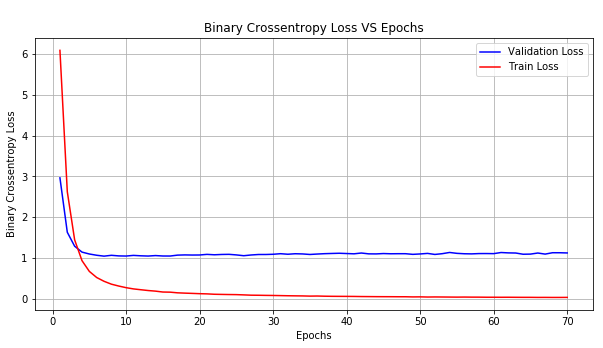

In [26]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,71))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [25]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import LSTM,Bidirectional
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(200,26)))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(26,dropout=0.5,return_sequences=True)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=5,validation_data=[testarray1,testy],batch_size=128) 


W0619 20:24:43.532114 140629908809600 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 130000 samples, validate on 20000 samples
Epoch 1/5
130000/130000 [==============================] - 801s 6ms/step - loss: 3.7448 - acc: 0.5683 - val_loss: 0.8746 - val_acc: 0.8793
Epoch 2/5
130000/130000 [==============================] - 788s 6ms/step - loss: 0.2431 - acc: 0.9697 - val_loss: 0.8588 - val_acc: 0.8860
Epoch 3/5
130000/130000 [==============================] - 786s 6ms/step - loss: 0.1112 - acc: 0.9911 - val_loss: 0.8922 - val_acc: 0.8881
Epoch 4/5
130000/130000 [==============================] - 788s 6ms/step - loss: 0.1043 - acc: 0.9925 - val_loss: 0.9823 - val_acc: 0.8818
Epoch 5/5
130000/130000 [==============================] - 792s 6ms/step - loss: 0.1062 - acc: 0.9915 - val_loss: 1.1620 - val_acc: 0.8638


Accuracy: 86.38%


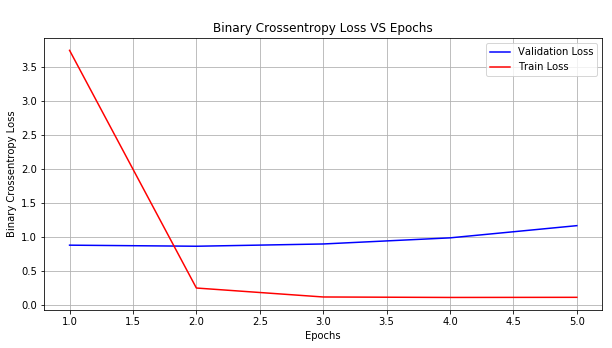

In [27]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,6))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
model=Sequential()
model.add(Conv1D(100,kernel_size=10,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(250,20,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=25,validation_data=[testarray1,testy],batch_size=256) 


Train on 115275 samples, validate on 21113 samples
Epoch 1/25
115275/115275 [==============================] - 67s 578us/step - loss: 5.3151 - acc: 0.2801 - val_loss: 2.2157 - val_acc: 0.6586
Epoch 2/25
115275/115275 [==============================] - 65s 564us/step - loss: 1.4764 - acc: 0.7387 - val_loss: 1.1932 - val_acc: 0.8027
Epoch 3/25
115275/115275 [==============================] - 65s 563us/step - loss: 0.4694 - acc: 0.8962 - val_loss: 1.0867 - val_acc: 0.8221
Epoch 4/25
115275/115275 [==============================] - 65s 565us/step - loss: 0.2276 - acc: 0.9449 - val_loss: 1.1101 - val_acc: 0.8257
Epoch 5/25
115275/115275 [==============================] - 65s 564us/step - loss: 0.1566 - acc: 0.9601 - val_loss: 1.0820 - val_acc: 0.8377
Epoch 6/25
115275/115275 [==============================] - 65s 563us/step - loss: 0.1241 - acc: 0.9668 - val_loss: 1.1276 - val_acc: 0.8399
Epoch 7/25
115275/115275 [==============================] - 65s 563us/step - loss: 0.1139 - acc: 0.9698

Accuracy: 85.53%


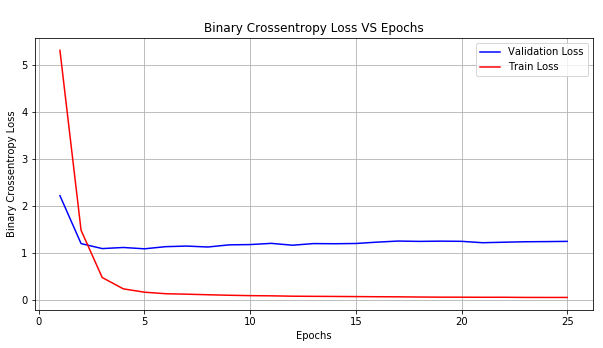

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,26))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
model=Sequential()
model.add(Conv1D(2000,kernel_size=26,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv1D(250,20,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=80,validation_data=[testarray1,testy],batch_size=128) 


W0619 09:23:08.199344 140477795272576 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 130000 samples, validate on 20000 samples
Epoch 1/80
130000/130000 [==============================] - 210s 2ms/step - loss: 6.7167 - acc: 0.1176 - val_loss: 3.9094 - val_acc: 0.4072
Epoch 2/80
130000/130000 [==============================] - 207s 2ms/step - loss: 3.6362 - acc: 0.4200 - val_loss: 2.0259 - val_acc: 0.6724
Epoch 3/80
130000/130000 [==============================] - 207s 2ms/step - loss: 2.2216 - acc: 0.5902 - val_loss: 1.4423 - val_acc: 0.7579
Epoch 4/80
130000/130000 [==============================] - 207s 2ms/step - loss: 1.5199 - acc: 0.6887 - val_loss: 1.1751 - val_acc: 0.7984
Epoch 5/80
130000/130000 [==============================] - 207s 2ms/step - loss: 1.1232 - acc: 0.7518 - val_loss: 1.0267 - val_acc: 0.8250
Epoch 6/80
130000/130000 [==============================] - 207s 2ms/step - loss: 0.8600 - acc: 0.7990 - val_loss: 0.9646 - val_acc: 0.8383
Epoch 7/80
130000/130000 [==============================] - 207s 2ms/step - loss: 0.6916 - acc: 0.8312 - val_

Accuracy: 90.34%


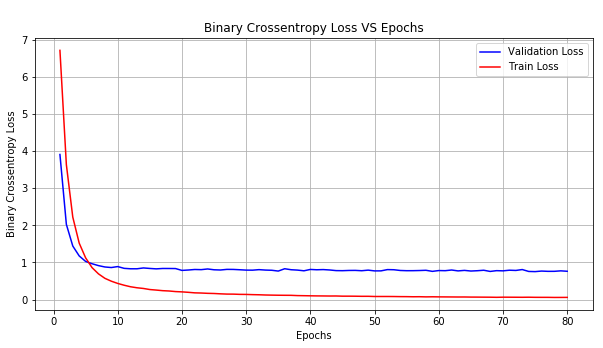

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,81))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import LSTM,Bidirectional
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(200,26)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(26,dropout=0.2,return_sequences=True))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu',input_shape=(200,26)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=60,validation_data=[testarray1,testy],batch_size=128) 


W0619 16:14:51.595402 140045008664448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 16:14:51.627513 140045008664448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 16:14:51.638072 140045008664448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 16:14:51.663547 140045008664448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0619 16:14:51.673146 

Train on 130000 samples, validate on 20000 samples
Epoch 1/60
130000/130000 [==============================] - 364s 3ms/step - loss: 7.1105 - acc: 0.0813 - val_loss: 5.0234 - val_acc: 0.3011
Epoch 2/60
130000/130000 [==============================] - 354s 3ms/step - loss: 4.0551 - acc: 0.3979 - val_loss: 2.2129 - val_acc: 0.6724
Epoch 3/60
130000/130000 [==============================] - 356s 3ms/step - loss: 2.1054 - acc: 0.6402 - val_loss: 1.2749 - val_acc: 0.7995
Epoch 4/60
130000/130000 [==============================] - 357s 3ms/step - loss: 1.2024 - acc: 0.7645 - val_loss: 0.9455 - val_acc: 0.8418
Epoch 5/60
130000/130000 [==============================] - 356s 3ms/step - loss: 0.7732 - acc: 0.8329 - val_loss: 0.8285 - val_acc: 0.8560
Epoch 6/60
130000/130000 [==============================] - 348s 3ms/step - loss: 0.5557 - acc: 0.8712 - val_loss: 0.7840 - val_acc: 0.8620
Epoch 7/60
130000/130000 [==============================] - 351s 3ms/step - loss: 0.4395 - acc: 0.8931 - val_

Accuracy: 88.17%


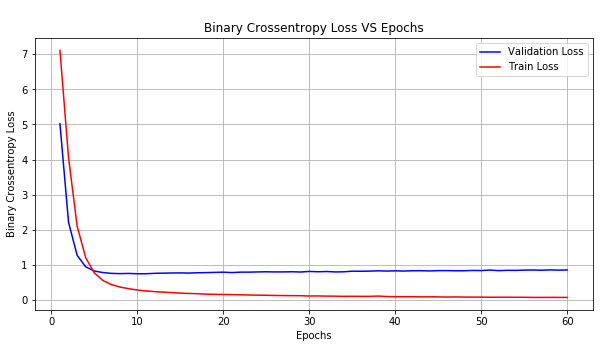

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,61))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
model=Sequential()
model.add(Conv1D(100,kernel_size=10,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(250,20,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=25,validation_data=[testarray1,testy],batch_size=256) 


W0618 13:48:12.199924 140483376052096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 13:48:12.241334 140483376052096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 13:48:12.250728 140483376052096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 13:48:12.290457 140483376052096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0618 13:48:12.305730 140483376052096 deprecation_wrapp

Train on 130000 samples, validate on 20000 samples
Epoch 1/25
130000/130000 [==============================] - 77s 591us/step - loss: 5.1009 - acc: 0.3052 - val_loss: 1.9616 - val_acc: 0.6892
Epoch 2/25
130000/130000 [==============================] - 69s 535us/step - loss: 1.3050 - acc: 0.7648 - val_loss: 1.0471 - val_acc: 0.8212
Epoch 3/25
130000/130000 [==============================] - 69s 532us/step - loss: 0.4258 - acc: 0.9047 - val_loss: 0.9388 - val_acc: 0.8430
Epoch 4/25
130000/130000 [==============================] - 69s 531us/step - loss: 0.2238 - acc: 0.9454 - val_loss: 0.9228 - val_acc: 0.8507
Epoch 5/25
130000/130000 [==============================] - 69s 531us/step - loss: 0.1656 - acc: 0.9579 - val_loss: 1.0461 - val_acc: 0.8388
Epoch 6/25
130000/130000 [==============================] - 69s 531us/step - loss: 0.1384 - acc: 0.9646 - val_loss: 0.9860 - val_acc: 0.8503
Epoch 7/25
130000/130000 [==============================] - 69s 531us/step - loss: 0.1185 - acc: 0.9691

Accuracy: 87.72%


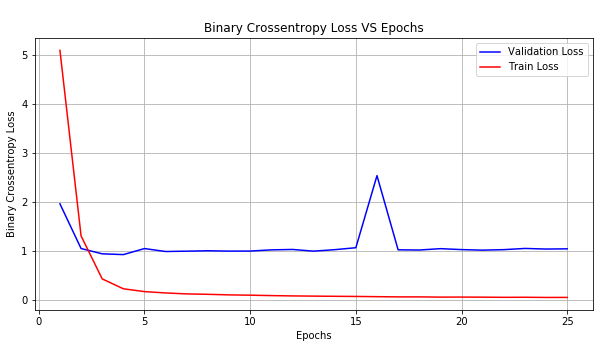

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,26))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
model=Sequential()
model.add(Conv1D(100,kernel_size=25,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(250,26,activation='relu'))
model.add(MaxPooling1D(pool_size=4))

model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=55,validation_data=[testarray1,testy],batch_size=64) 


Train on 130000 samples, validate on 20000 samples
Epoch 1/80
130000/130000 [==============================] - 98s 755us/step - loss: 5.9637 - acc: 0.1907 - val_loss: 2.9397 - val_acc: 0.5316
Epoch 2/80
130000/130000 [==============================] - 95s 729us/step - loss: 2.6973 - acc: 0.5357 - val_loss: 1.5884 - val_acc: 0.7259
Epoch 3/80
130000/130000 [==============================] - 95s 728us/step - loss: 1.5215 - acc: 0.6920 - val_loss: 1.2224 - val_acc: 0.7853
Epoch 4/80
130000/130000 [==============================] - 95s 728us/step - loss: 1.0194 - acc: 0.7727 - val_loss: 1.0830 - val_acc: 0.8136
Epoch 5/80
130000/130000 [==============================] - 95s 729us/step - loss: 0.7519 - acc: 0.8211 - val_loss: 1.0255 - val_acc: 0.8237
Epoch 6/80
130000/130000 [==============================] - 95s 728us/step - loss: 0.6017 - acc: 0.8516 - val_loss: 0.9725 - val_acc: 0.8367
Epoch 7/80
130000/130000 [==============================] - 95s 729us/step - loss: 0.5003 - acc: 0.8719

Accuracy: 88.89%


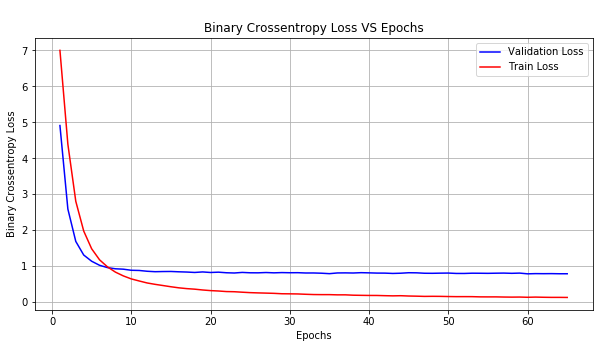

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,66))

# Validation loss

vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
model=Sequential()
model.add(Conv1D(100,kernel_size=(26),activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(250,26,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=60,validation_data=[testarray1,testy],batch_size=128) 


W0618 17:02:57.990099 140483376052096 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 130000 samples, validate on 20000 samples
Epoch 1/60
130000/130000 [==============================] - 63s 484us/step - loss: 6.9390 - acc: 0.0836 - val_loss: 4.6362 - val_acc: 0.3158
Epoch 2/60
130000/130000 [==============================] - 60s 461us/step - loss: 4.3252 - acc: 0.3231 - val_loss: 2.6183 - val_acc: 0.5752
Epoch 3/60
130000/130000 [==============================] - 60s 462us/step - loss: 2.9310 - acc: 0.4804 - val_loss: 1.8188 - val_acc: 0.6942
Epoch 4/60
130000/130000 [==============================] - 60s 463us/step - loss: 2.1949 - acc: 0.5759 - val_loss: 1.4445 - val_acc: 0.7467
Epoch 5/60
130000/130000 [==============================] - 60s 462us/step - loss: 1.7564 - acc: 0.6377 - val_loss: 1.2535 - val_acc: 0.7788
Epoch 6/60
130000/130000 [==============================] - 60s 462us/step - loss: 1.4390 - acc: 0.6879 - val_loss: 1.1255 - val_acc: 0.8014
Epoch 7/60
130000/130000 [==============================] - 60s 461us/step - loss: 1.2149 - acc: 0.7254

Accuracy: 89.60%


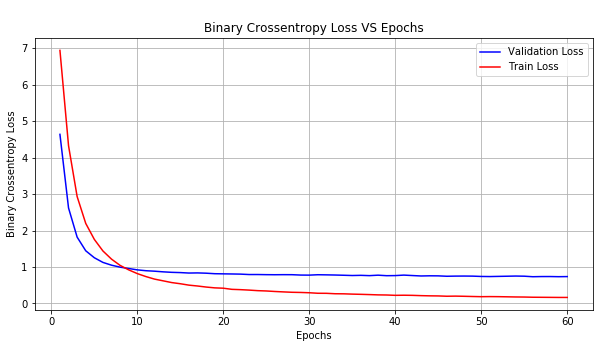

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
model=Sequential()
model.add(Conv1D(1500,kernel_size=21,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(500,26,dilation_rate=2,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv1D(512,1,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=100,validation_data=[testarray1,testy],batch_size=256) 


Train on 130000 samples, validate on 20000 samples
Epoch 1/100
130000/130000 [==============================] - 233s 2ms/step - loss: 6.5850 - acc: 0.1133 - val_loss: 4.0728 - val_acc: 0.3664
Epoch 2/100
130000/130000 [==============================] - 221s 2ms/step - loss: 3.2637 - acc: 0.4496 - val_loss: 2.0201 - val_acc: 0.6458
Epoch 3/100
130000/130000 [==============================] - 220s 2ms/step - loss: 1.7078 - acc: 0.6577 - val_loss: 1.3805 - val_acc: 0.7435
Epoch 4/100
130000/130000 [==============================] - 220s 2ms/step - loss: 1.0127 - acc: 0.7693 - val_loss: 1.0908 - val_acc: 0.7903
Epoch 5/100
130000/130000 [==============================] - 220s 2ms/step - loss: 0.6610 - acc: 0.8369 - val_loss: 0.9763 - val_acc: 0.8131
Epoch 6/100
130000/130000 [==============================] - 220s 2ms/step - loss: 0.4879 - acc: 0.8733 - val_loss: 0.9408 - val_acc: 0.8196
Epoch 7/100
130000/130000 [==============================] - 220s 2ms/step - loss: 0.3828 - acc: 0.8969

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import LSTM,Bidirectional
model=Sequential()
model.add(Conv1D(500,kernel_size=(26),activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(250,26,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.7))
model.add(Bidirectional(LSTM(300,dropout=0.4,return_sequences=True)))
model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=60,validation_data=[testarray1,testy],batch_size=128) 


W0619 07:20:06.596103 140182523484032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 07:20:06.654401 140182523484032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 07:20:06.676386 140182523484032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 07:20:06.721345 140182523484032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0619 07:20:06.729445 140182523484032 deprecation_wrapp

Train on 130000 samples, validate on 20000 samples
Epoch 1/60
130000/130000 [==============================] - 349s 3ms/step - loss: 6.2155 - acc: 0.1286 - val_loss: 3.5157 - val_acc: 0.3762
Epoch 2/60
130000/130000 [==============================] - 340s 3ms/step - loss: 3.0838 - acc: 0.4326 - val_loss: 1.9675 - val_acc: 0.6191
Epoch 3/60
130000/130000 [==============================] - 339s 3ms/step - loss: 1.7447 - acc: 0.6145 - val_loss: 1.5395 - val_acc: 0.7067
Epoch 4/60
130000/130000 [==============================] - 339s 3ms/step - loss: 1.1114 - acc: 0.7286 - val_loss: 1.4451 - val_acc: 0.7418
Epoch 5/60
130000/130000 [==============================] - 340s 3ms/step - loss: 0.7962 - acc: 0.7921 - val_loss: 1.4290 - val_acc: 0.7565
Epoch 6/60
130000/130000 [==============================] - 340s 3ms/step - loss: 0.6128 - acc: 0.8333 - val_loss: 1.4331 - val_acc: 0.7676
Epoch 7/60
130000/130000 [==============================] - 339s 3ms/step - loss: 0.5084 - acc: 0.8577 - val_

Accuracy: 81.77%


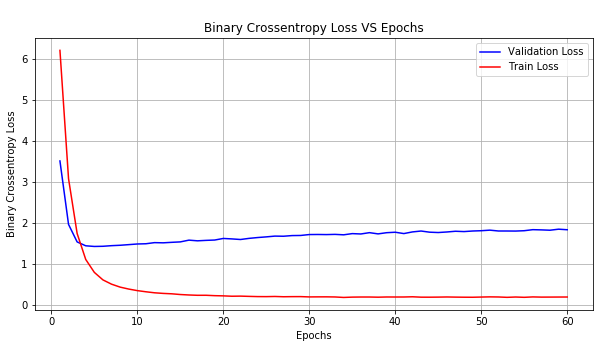

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,61))

# Validation loss

vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import LSTM,Bidirectional
model=Sequential()
model.add(Dense(200,activation='relu',input_shape=(200,26)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(26,dropout=0.2,return_sequences=True)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(11180,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=2,validation_data=[testarray1,testy],batch_size=128) 


Train on 130000 samples, validate on 20000 samples
Epoch 1/2
130000/130000 [==============================] - 766s 6ms/step - loss: 2.7829 - acc: 0.6851 - val_loss: 0.8493 - val_acc: 0.8886
Epoch 2/2
130000/130000 [==============================] - 761s 6ms/step - loss: 0.2382 - acc: 0.9801 - val_loss: 0.8404 - val_acc: 0.8921


Accuracy: 89.22%


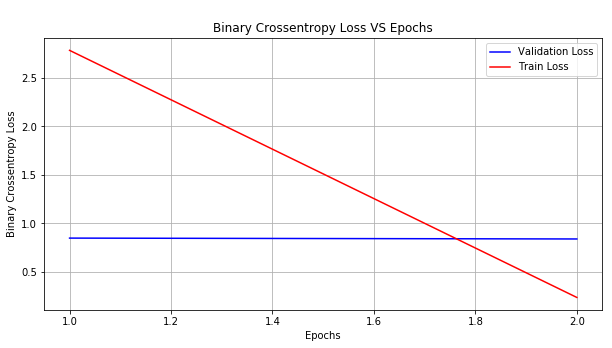

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,3))

# Validation loss

vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

**** ****
## ** WITH 180000 POINTS AS TRIAINING DATA 

In [0]:
import pandas as pd
import numpy as np

In [0]:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 6.6MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1dRP2sKGX_8oOqlRSR2FQNUhneR3bfGrc' # The shareable link

In [0]:
fluff, id = link.split('=')

In [0]:
import pickle
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('trainarray.npy')  
trainarray= np.load('trainarray.npy')

In [0]:
link = 'https://drive.google.com/open?id=1Bd2MrmGsDVmQZgt5xCphyhLWHctuOwG8' # The shareable link

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testarray.npy')  
testarray= np.load('testarray.npy')

In [0]:
link = 'https://drive.google.com/open?id=1Di8VvI-XxNcTtcYIC3zk-lOO1TiOPU0q' # The shareable link

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cvarray.npy')  
cvarray= np.load('cvarray.npy')

In [0]:
link = 'https://drive.google.com/open?id=1Jw6cyVYaJ-HL16Ox6X0Ab5KsqQxGEClR' # The shareable link

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('traindataframeclasslabel.csv')  
traindataframe= pd.read_csv('traindataframeclasslabel.csv',names=['a','b'])

In [0]:
link = 'https://drive.google.com/open?id=1hhWTqUSQ1TVQtvp-YN36E5sCx7XkPDh7' # The shareable link

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testdataframeclasslabel.csv')  
testdataframe= pd.read_csv('testdataframeclasslabel.csv',names=['a','b'])

In [0]:
link = 'https://drive.google.com/open?id=1BzVl-SWjGkQ1819BSQ9GbgHf-8PLcJNH' # The shareable link

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cvdataframeclasslabel.csv')  
cvdataframe= pd.read_csv('cvdataframeclasslabel.csv',names=['a','b'])

In [0]:
print(traindataframe.shape)
print(testdataframe.shape)
print(cvdataframe.shape)

(180000,)
(20000, 2)
(20000, 2)


In [0]:
print(traindataframe.head(3))

0     PF13376.6
1    PF01381.22
2    PF00300.22
Name: b, dtype: object


In [0]:
traindataframe=traindataframe['b']


In [0]:
testdataframe=testdataframe['b']
cvdataframe=cvdataframe['b']

In [0]:
totaldataframe=pd.concat([traindataframe,testdataframe],axis=0)

In [0]:
totaldataframe.head(3)

0     PF13376.6
1    PF01381.22
2    PF00300.22
Name: b, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
out=vect.fit_transform(totaldataframe)
features=vect.get_feature_names()
counts=out.sum(axis=0)
print('number of unique class lables are',len(features))

number of unique class lables are 11836


In [0]:
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense,Dropout
from keras.utils import np_utils

In [0]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
label1.fit(totaldataframe)
trainy=label1.transform(traindataframe)
testy=label1.transform(testdataframe)
#cvy=label1.transform(cvdataframe['family_accession'])

In [0]:
# this function is used draw Binary Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('\nBinary Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
model=Sequential()
model.add(Conv1D(100,kernel_size=(26),activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(250,26,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(11836,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray,trainy,epochs=60,validation_data=[testarray,testy],batch_size=128) 

W0619 10:52:49.821394 139727061636992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 10:52:49.864488 139727061636992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 10:52:49.874052 139727061636992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 10:52:49.918748 139727061636992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0619 10:52:49.928320 139727061636992 deprecation_wrapp

Train on 180000 samples, validate on 20000 samples
Epoch 1/60
180000/180000 [==============================] - 157s 874us/step - loss: 5.5257 - acc: 0.2277 - val_loss: 2.8999 - val_acc: 0.5254
Epoch 2/60
180000/180000 [==============================] - 149s 825us/step - loss: 2.0066 - acc: 0.6391 - val_loss: 1.6602 - val_acc: 0.7128
Epoch 3/60
180000/180000 [==============================] - 149s 826us/step - loss: 0.9869 - acc: 0.8030 - val_loss: 1.3317 - val_acc: 0.7723
Epoch 4/60
180000/180000 [==============================] - 148s 823us/step - loss: 0.6012 - acc: 0.8794 - val_loss: 1.2425 - val_acc: 0.7936
Epoch 5/60
180000/180000 [==============================] - 148s 822us/step - loss: 0.4280 - acc: 0.9166 - val_loss: 1.2195 - val_acc: 0.8114
Epoch 6/60
180000/180000 [==============================] - 148s 824us/step - loss: 0.3434 - acc: 0.9367 - val_loss: 1.2495 - val_acc: 0.8144
Epoch 7/60
180000/180000 [==============================] - 148s 824us/step - loss: 0.2966 - acc:

Accuracy: 86.83%


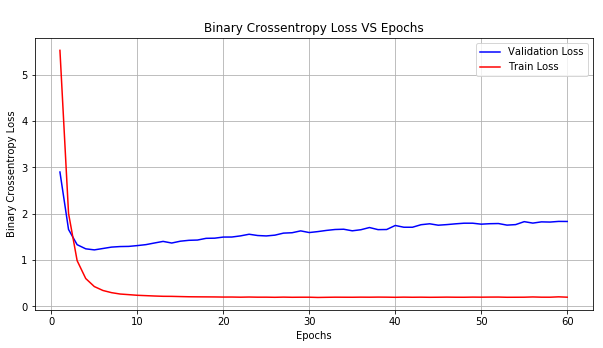

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,61))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
model=Sequential()
model.add(Conv1D(2000,kernel_size=26,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv1D(250,20,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(11836,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray,trainy,epochs=30,validation_data=[testarray,testy],batch_size=128) 


W0619 19:50:21.398618 139644765677440 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0619 19:50:21.626489 139644765677440 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 180000 samples, validate on 20000 samples
Epoch 1/30
180000/180000 [==============================] - 329s 2ms/step - loss: 4.6548 - acc: 0.3767 - val_loss: 1.5470 - val_acc: 0.7329
Epoch 2/30
180000/180000 [==============================] - 343s 2ms/step - loss: 1.2378 - acc: 0.7697 - val_loss: 0.9925 - val_acc: 0.8195
Epoch 3/30
180000/180000 [==============================] - 342s 2ms/step - loss: 0.5234 - acc: 0.8860 - val_loss: 0.9045 - val_acc: 0.8399
Epoch 4/30
180000/180000 [==============================] - 342s 2ms/step - loss: 0.3116 - acc: 0.9275 - val_loss: 1.1124 - val_acc: 0.8037
Epoch 5/30
180000/180000 [==============================] - 341s 2ms/step - loss: 0.2337 - acc: 0.9440 - val_loss: 0.7667 - val_acc: 0.8640
Epoch 6/30
180000/180000 [==============================] - 326s 2ms/step - loss: 0.1846 - acc: 0.9558 - val_loss: 0.6613 - val_acc: 0.8891
Epoch 7/30
180000/180000 [==============================] - 326s 2ms/step - loss: 0.1633 - acc: 0.9608 - val_

Accuracy: 92.86%


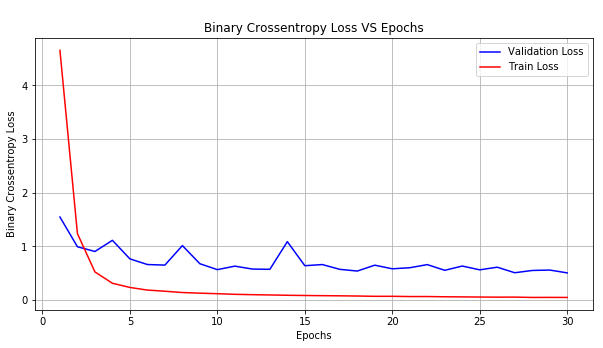

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,31))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
#do bidirectional lstm in this
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import LSTM,Bidirectional
model=Sequential()
model.add(Dense(200,activation='relu',input_shape=(200,26)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(26,dropout=0.2,return_sequences=True)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(11836,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray,trainy,epochs=3,validation_data=[testarray,testy],batch_size=128) 


Using TensorFlow backend.
W0620 12:33:09.188477 140488317740928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 12:33:09.227867 140488317740928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 12:33:09.237042 140488317740928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 12:33:09.270805 140488317740928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

Train on 180000 samples, validate on 20000 samples
Epoch 1/3
180000/180000 [==============================] - 1538s 9ms/step - loss: 2.2988 - acc: 0.7371 - val_loss: 0.6325 - val_acc: 0.9112
Epoch 2/3
180000/180000 [==============================] - 1536s 9ms/step - loss: 0.2449 - acc: 0.9800 - val_loss: 0.6362 - val_acc: 0.9126
Epoch 3/3
180000/180000 [==============================] - 1511s 8ms/step - loss: 0.2006 - acc: 0.9867 - val_loss: 0.6668 - val_acc: 0.9104


Accuracy: 91.04%


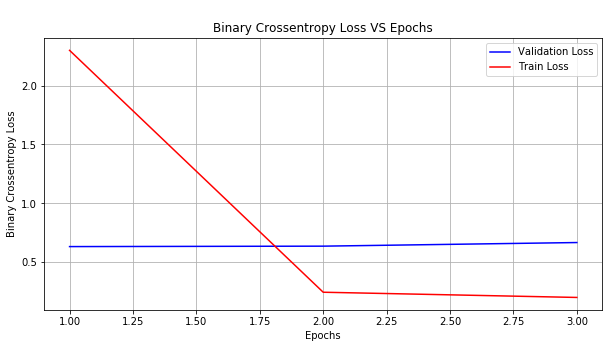

In [0]:
import matplotlib.pyplot as plt
scores = model.evaluate(testarray,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,4))

# Validation loss

vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

##*** FOR 130000 POINTS.

In [6]:
import pandas as pd
s=[['CONVOLUTIONAL','70','128','(100,250)','(0.5,0.6)','(21,26)','0.98','0.89'],['CONVOLUTIONAL+LSTM','70','128','(300,250,300(LSTM))','(0.4,0.6,0.4)','(21,26)','0.98','0.88'],['CONVOLUTIONAL+LSTM','70','256','(300,250,500(LSTM))','(0.7,0.7,0.4)','(26,26)','0.98','0.86'],['DENSE+(BIDRIRECTIONAL LSTM)','5','128','(256,26(LSTM))','(0.7,0.5)','NONE','0.99','0.86'],['CONVOLUTIONAL','25','256','(100,250','(0.2,0.2)','(10,20)','0.85','0.85'],['CONVOLUTIONAL','80','128','(2000,250)','(0.4,0.6)','(26,20)','0.98','0.9'],['DENSE+LSTM+DENSE','60','128','(256,26,128)','(0.3,0.2,0.3)','NONE','0.85','0.88'],['CONVOLUTIONAL','25','256','(100,250)','(0.2,0.2)','(10,20)','0.98','0.87'],['CONVOLUTIONAL','80','64','(100,250)','(0.2,0.3)','(25,26)','0.85','0.89'],['CONVOLUTIONAL','60','128','(100,250))','(0.5)','(26,26)','0.95','0.90'],['CONVOLUTIONAL','100','256','(1500,500,512)','(0.5,0.4,0.4)',"(21,26,1('ARCH. INSP.BY RESNET&BOT-NECK'))",'0.99','0.9'],['CONVOLUTIONAL+CONVOLUTIONAL+BIDIRECTIONAL-LSTM','60','128','(500,250,300(BI-LSTM))','(0.5,0.7,0.4)','(26,26)','0.95','0.82'],['DENSE+BIDIRECTIONAL-LSTM','2','128','(200,26)','(0.4,0.2)','NONE','0.98','0.89']]

x=pd.DataFrame(s,columns=['DEEPLEARNINGTECHNIQUE','EPOCHS','BATCHSIZE','CONFIGURATION','DROPOUT RATES','KERNEL SIZE','TRAINING ACCURACY','TEST ACCURACY'])
x

,DEEPLEARNINGTECHNIQUE,EPOCHS,BATCHSIZE,CONFIGURATION,DROPOUT RATES,KERNEL SIZE,TRAINING ACCURACY,TEST ACCURACY
0,CONVOLUTIONAL,70,128,"(100,250)","(0.5,0.6)","(21,26)",0.98,0.89
1,CONVOLUTIONAL+LSTM,70,128,"(300,250,300(LSTM))","(0.4,0.6,0.4)","(21,26)",0.98,0.88
2,CONVOLUTIONAL+LSTM,70,256,"(300,250,500(LSTM))","(0.7,0.7,0.4)","(26,26)",0.98,0.86
3,DENSE+(BIDRIRECTIONAL LSTM),5,128,"(256,26(LSTM))","(0.7,0.5)",NONE,0.99,0.86
4,CONVOLUTIONAL,25,256,"(100,250","(0.2,0.2)","(10,20)",0.85,0.85
5,CONVOLUTIONAL,80,128,"(2000,250)","(0.4,0.6)","(26,20)",0.98,0.9
6,DENSE+LSTM+DENSE,60,128,"(256,26,128)","(0.3,0.2,0.3)",NONE,0.85,0.88
7,CONVOLUTIONAL,25,256,"(100,250)","(0.2,0.2)","(10,20)",0.98,0.87
8,CONVOLUTIONAL,80,64,"(100,250)","(0.2,0.3)","(25,26)",0.85,0.89
9,CONVOLUTIONAL,60,128,"(100,250))",(0.5),"(26,26)",0.95,0.90




> ## ** FOR 180000 TRAINING SAMPLES



In [8]:
import pandas as pd
s=[['CONVOLUTIONAL','60','128','(100,250)','(0.5)','(26,26)','0.98','0.86'],['CONVOLUTIONAL','30','128','(2000,250)','(0.4,0.6)','(26,20)','0.99','0.93'],['DENSE+BIDIRECTIONAL-LSTM','2','128','(200,26)','(0.4,0.2)','NONE','0.98','0.91']]

x=pd.DataFrame(s,columns=['DEEPLEARNINGTECHNIQUE','EPOCHS','BATCHSIZE','CONFIGURATION','DROPOUT RATES','KERNEL SIZE','TRAINING ACCURACY','TEST ACCURACY'])
x

,DEEPLEARNINGTECHNIQUE,EPOCHS,BATCHSIZE,CONFIGURATION,DROPOUT RATES,KERNEL SIZE,TRAINING ACCURACY,TEST ACCURACY
0,CONVOLUTIONAL,60,128,"(100,250)",(0.5),"(26,26)",0.98,0.86
1,CONVOLUTIONAL,30,128,"(2000,250)","(0.4,0.6)","(26,20)",0.99,0.93
2,DENSE+BIDIRECTIONAL-LSTM,2,128,"(200,26)","(0.4,0.2)",NONE,0.98,0.91


# OBSERVATIONS DOCUMENTATION AND KEYTAKEAWAYS.



#### IN PFAM RANDOM SPLIT CASE STUDY WE ARE GIVEN WITH SEQUENCE AND WE HAVE TO PREDICT THE FMILY OF THE PROTEIN. WE HAVE TO PREDICT THE FAMILY PROTEIN.
#### WE HAVE THE INPUT FEATURES TO OUR MODEL .AMINO ACID IS THE SEQUENCE FOR THIS DOMAIN.

#### Description of fields: - sequence: These are usually the input features to your model. Amino acid sequence for this domain. There are 20 very common amino acids (frequency > 1,000,000), and 4 amino acids that are quite uncommon: X, U, B, O, Z. - family_accession: These are usually the labels for your model. Accession number in form PFxxxxx.y (Pfam), where xxxxx is the family accession, and y is the version number.


#### WE HAVE DATA FOR TRAINING ,CROSS VALIDATION AND TESTING SEPERATELY. WE HAVE DONE EXPLORATORY DATA ANALTYSIS FOR DATA. WE HAVE 1100 CLASS LABELS WHICH ARE VERY FREQUENT.


#### OBSERVATIONS ARE FEW FAMILY ACCESSIONS ARE SIMILAR
##### FROM THE EXPLOARTORY DATA ANLYSIS HISTOGRAM PLOTS OF WE HAVE VISUALISED SEQUENCE LENGTH THE TRAIN DATA , TEST DATA AND CROSS VALIDATION DATA.
#### WE HAVE VISUALISED THE BOXPLOT AND VIOLIN PLOT FOR THE ALIGNMENT LENGTH.

#### WE HAVE PLOTTED THE PROBABILITY DENSITY FUNCTION AND CONSIDERD THE LENGTH OF SEQUENCE.WE HAVE CONSIDERD THE LENGTH OF 200 DUE TO LACK OF COMPUTATIONAL POWER. WE HAVE ALSO PLOTTED THE LENGTH OF SEQUENCE.

#### WE HAVE ENCODED EVERY LETTER OF SEQUENCE INTO LENGTH OF 26. WE HAVE OBTAINED THE SEQUENCE PATTERN AND DETERMINED THE CLASS LABEL.

#### THERE ARE FEW KEY TAKE AWAYS 
* SEQUEENCE LENGTH IS ALMOST SIMILAR FOR THE PARTICULAR CLASS LABEL.
* THE SEQUENCE OF THE PROTEIN FOLLOW A PATTERN.

#### WE WILL TRAINED THE MODEL USING THE CONVOLUTIONAL NERAL NETWORS  FROM THE FEATURES WE EXTRACT TO PREDICT THE CLASSLABEL.

#### OBSERVATIONS AFTER PERFORMING FEATURE EXTRACTION:-
** UNIQUE CLASS LABELS HAVE UNIQUE LENGTH OF SEQUENCE

** THE SEQUENCE WHICH ARE REPRESENTED BY THE UNDEFINED DOTS THEIR INDICES ARE ALMOST SIMILAR FOR THAT PARTICULAR CLASSLABEL.

#### THERE ARE VARIOUS RESEARCH PAPERS,BLOGS,YOUTUBE VIDEOS WHICH DESCRIBE THE REALTION OF PROTEIN SEQUENCES..

#### ALL THE ANLAYSIS WE HAVE DONE IS PART OF PROTEIN SEQUENCING TO PREDICT WHETHER THAT PROTEIN SEQUENCE BELONGS TO PARTICULAR FAMILY OR NOT.

#### WE HAVE USED VARIOUS CONFIGURATIONS WE HAVE OBTAINED THE MAXIMUM ACCURACY OF  PERCENT.


#### WE HAVE USED RELU AS THE ACTIVATION FUNCTION FOR THE INPUT AND HIDDEN LAYERS AND SOFTMAX AS THE ACTIVATION FUNCTION TO PREDICT FOR THE OUTPUT LAYER BASED ON PROBABILTY.

#### WE CONSIDERD ACCURACY AS THE METRIC. WE HAVE PLOTTED THE GRAPHS FOR THE TRAINLOSS AND CROSS VALIDATION LOSS TO SEE THE HOW MODEL IS PERFORMING AND WHETHER THE MODEL IS OVERFITTING OR UNDERFITTING.

#### WE HAVE USED DROPUTS AND BATCH NORMALIZATION WHICH ARE USED TO PREVENT THE OVERFITTING OF THE MODEL.

#### USING THE DROPOUT LAYER WE CAN SWITCH OFF THE CELLS OF LAYER BASED ON THE PROBABILITY GIVEN.

### WE HAVE TRAINED THE MODEL ON 130000 SAMPLES OF TRAIN DATA. WE HAVE USED VARIOUS DEEP LEARNING TECHNUIQUES FROM THE MULTI LAYER PERCEPTRONS ,CONVOLUTIONAL NUERAL NETWORKS,VARIOUS ARCHITECTURES OF CONVOLUTIONAL NYUERAL NETWROKS SPECIALLY INSPIRED BY RESIDUAL NETWORKS AND EXTRACTION OF BOTTLENECK FEATURES.


### WE HAVE ALSO DONE THE LSTM LAYER (LONG-SHORT-TERM MERMORY) AND THE BIDIRECTIONAL LSTM WITH VARYING THE NUMER OF EPOCHS,BATCH SIZE KERNEL SIZE(IN CASE OF CNN) WITH DIFFERENT DROPOUT RATES .WE HAVE USED BOTH CNN ALONG WITH BIDIRECTIONAL LSTM AND LSTM IN SOME CASES. WE HAVE OBTAINED THE ACCURACY OF 90 PERCENTAGE USING THE CONVOLUTIONAL NUERAL NETS AND BIDIRECTIONAL LSTMS.


### WE HAVE ALSO USED 180000 TRAINING SAMPLES DIRECTLY UPLOADED IN THE DRIVE PROCESSING IN LATOP OF 32 GB RAM. USING THE 180000 TRAINING SAMPLES WE HAVE ACHIEVED THE ACCURACY OF APPROXIMATELY 93 PERCENTAGE( 0.928) WITH CONVOLUTIONAL NUERAL NETWORKS.

### THIS ARE THE DEEPLEARNING TECHNIQUES THAT ARE USED WHICH ARE BETTER THEAN THE HIDDEN MARKOV MODELS TAKES LESS TIME AND COMPUTATION POWER AND ACHIEVE BEST RESULTS.